## Predicting the Mode of Failure

## 1.Problem Defination
Given the various operating parameters of a Machine, predicting the type of failure that might occur for this working condition.


## 2.Data
The data used for this project is taken from kaggle:https://www.kaggle.com/shivamb/machine-predictive-maintenance-classification.

The dataset consists of 10 000 data points stored as rows with 14 features in columns

* UID: unique identifier ranging from 1 to 10000
productID: consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number
* air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
* process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
* rotational speed [rpm]: calculated from powepower of 2860 W, overlaid with a normally distributed noise
* torque [Nm]: torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values.
* tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.
 and a
'machine failure' label that indicates, whether the machine has failed in this particular data point for any of the following failure modes are true.

## 3.Evaluation
Receiver operating characteristics(roc)

## 4.Features
The features provided in the dataset are:
* UID
* air temperature [K]
* process temperature [K]
* rotational speed [rpm]
* torque [Nm]
* tool wear [min]

### Importing the necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
%matplotlib inline

### Loading Data into Data Frame

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Projects/Predicting the Mode of Failure/predictive_maintenance.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


### Dropping unneccessary columns

In [4]:
col_to_drop=df.columns[:2].to_list()
col_to_drop.append('Target')
col_to_drop

['UDI', 'Product ID', 'Target']

In [5]:
df.drop(col_to_drop,axis=1,inplace=True)
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,M,298.1,308.6,1551,42.8,0,No Failure
1,L,298.2,308.7,1408,46.3,3,No Failure
2,L,298.1,308.5,1498,49.4,5,No Failure
3,L,298.2,308.6,1433,39.5,7,No Failure
4,L,298.2,308.7,1408,40.0,9,No Failure


### Basic EDA

In [6]:
df.shape

(10000, 7)

In [7]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000
std,2.000259,1.483734,179.284096,9.968934,63.654147
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(2), object(2)
memory usage: 547.0+ KB


In [9]:
df.any()

Type                       True
Air temperature [K]        True
Process temperature [K]    True
Rotational speed [rpm]     True
Torque [Nm]                True
Tool wear [min]            True
Failure Type               True
dtype: bool

**Inference:There are no missing values**

In [10]:
(df['Failure Type'].value_counts()/df.shape[0])*100

No Failure                  96.52
Heat Dissipation Failure     1.12
Power Failure                0.95
Overstrain Failure           0.78
Tool Wear Failure            0.45
Random Failures              0.18
Name: Failure Type, dtype: float64

**Inference:There is imbalance in the class labels as majority is No Failure(96.52%) and remaining classes constitute only 3.48% .**

## 5.EDA

### Univariate

In [11]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Failure Type'],
      dtype='object')

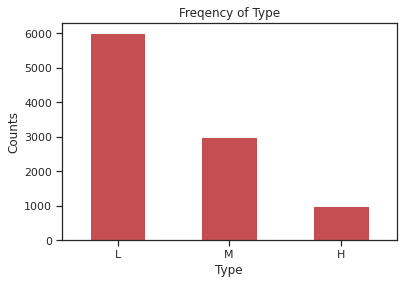

In [12]:
sns.set_style('ticks')
df['Type'].value_counts().plot(kind='bar',title="Freqency of Type",ylabel="Counts",xlabel='Type',rot=0,color='r');


In [13]:
# df['Air temperature [K]'].plot(kind='hist',title="Distribution of Air Temperature[K]",color='pink',xlabel='Air temperature [K]',figsize=(8,6),bins=12);
# df['Air temperature [K]'].plot(kind='kde')

Text(0.5, 1.0, 'Distribution of Air Temperature[K]')

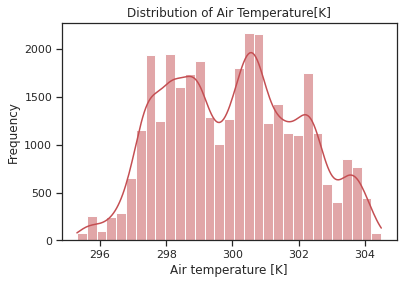

In [14]:
sns.histplot(data=df,x='Air temperature [K]',kde=True,stat='frequency',color='r')
plt.title('Distribution of Air Temperature[K]')

Text(0.5, 1.0, 'Distribution of Process temperature [K]')

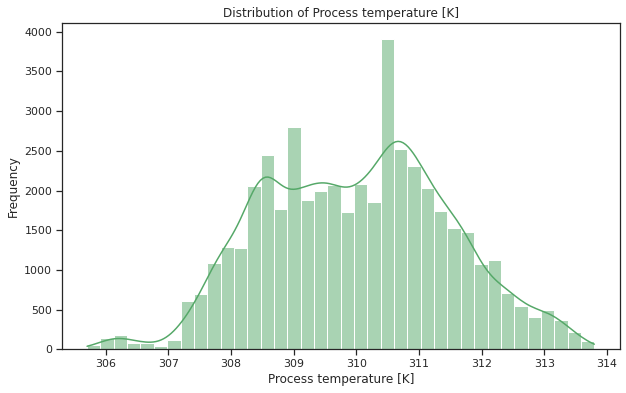

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='Process temperature [K]',kde=True,stat='frequency',color='g')
plt.title('Distribution of Process temperature [K]')

Text(0.5, 1.0, 'Distribution of Rotational speed [rpm]')

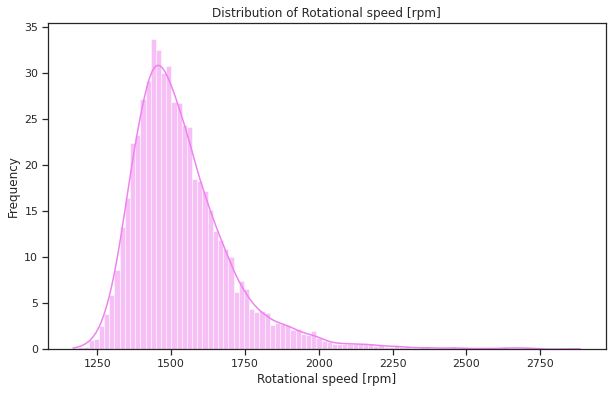

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='Rotational speed [rpm]',kde=True,stat='frequency',color='violet')
plt.title('Distribution of Rotational speed [rpm]')

**Inference:Right Skewed**

Text(0.5, 1.0, 'Distribution of Torque [Nm]')

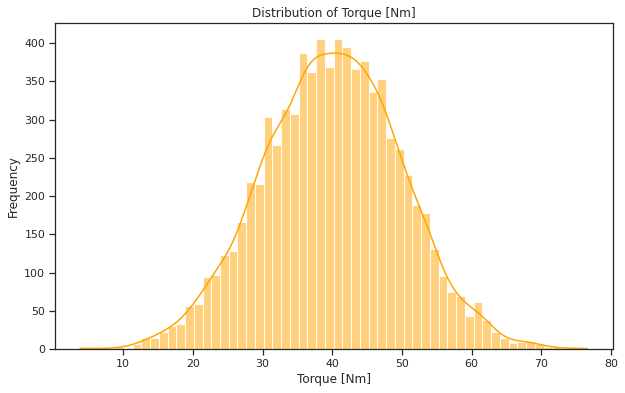

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='Torque [Nm]',kde=True,stat='frequency',color='orange')
plt.title('Distribution of Torque [Nm]')

### Multivariate

### Checking for mullticollinearity using Variance Inflation factor

In [18]:
numerical_col=df.select_dtypes(include=np.number).columns.to_list()
numerical_col

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]']

In [19]:
# standardizing the values
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_df=sc.fit_transform(df[numerical_col])

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [21]:
vif_values=pd.DataFrame()
for c in numerical_col:
    vif_values['vif']=[variance_inflation_factor(scaled_df,i) for i in range(len(numerical_col))]
    vif_values['features']=numerical_col
vif_values

,vif,features
0,4.303979,Air temperature [K]
1,4.302788,Process temperature [K]
2,4.270132,Rotational speed [rpm]
3,4.268850,Torque [Nm]
4,1.000237,Tool wear [min]


**Inference:Since vif value for each feature is less than 5,there is no multicollinearity among the feaure variables**

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Feature Importance using SelectKBest

In [23]:
from sklearn.feature_selection import SelectKBest,f_classif


In [24]:
X=df.drop(columns=['Type','Failure Type'])
y=df['Failure Type']

In [25]:
X.columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
      dtype='object')

In [26]:
new_df=SelectKBest(score_func=f_classif,k='all').fit(X,y)

In [27]:
f_imp=pd.DataFrame({
                       'Feature':X.columns,
                        'Importance':new_df.scores_}
)
                      
f_imp.sort_values(by='Importance',ascending=True,inplace=True)
f_imp.reset_index(inplace=True,drop=True)
f_imp

,Feature,Importance
0,Process temperature [K],7.602878
1,Air temperature [K],38.790896
2,Tool wear [min],68.194918
3,Rotational speed [rpm],78.214308
4,Torque [Nm],104.401379


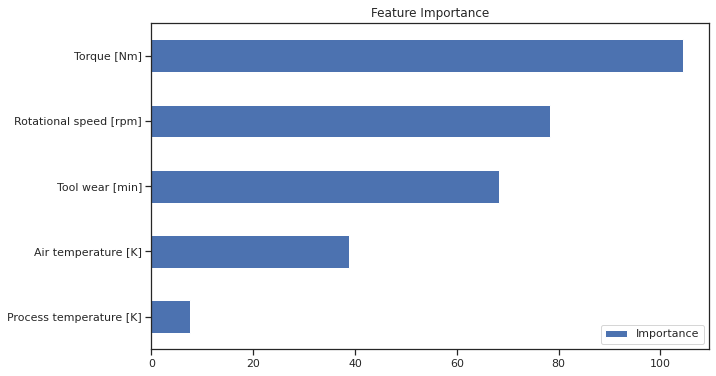

In [28]:
f_imp.plot(kind='barh',figsize=(10,6),title='Feature Importance')
plt.yticks(ticks=f_imp.index,labels=f_imp['Feature']);

**Inference:Process Temperature has the least Importance but since I have manageble number of features
    I'm keeping it**

In [29]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,M,298.1,308.6,1551,42.8,0,No Failure
1,L,298.2,308.7,1408,46.3,3,No Failure
2,L,298.1,308.5,1498,49.4,5,No Failure
3,L,298.2,308.6,1433,39.5,7,No Failure
4,L,298.2,308.7,1408,40.0,9,No Failure


## 6.Preparing the Dateset for Modelling

#### Encoding the target variable

In [30]:
from sklearn.preprocessing import LabelEncoder
df['Failure Type']=LabelEncoder().fit_transform(df['Failure Type'])
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,M,298.1,308.6,1551,42.8,0,1
1,L,298.2,308.7,1408,46.3,3,1
2,L,298.1,308.5,1498,49.4,5,1
3,L,298.2,308.6,1433,39.5,7,1
4,L,298.2,308.7,1408,40.0,9,1


In [31]:
X=df.drop(columns='Failure Type')
y=df['Failure Type']

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y)

### Performing Encoding and Scaling on Train set

In [33]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler

In [34]:
ohe=OneHotEncoder()
rs=RobustScaler()

In [35]:
numericol_col=df.select_dtypes(include=np.number).columns.to_list()
print("Numerical columns:",numerical_col)
categorical_col=df.select_dtypes(include='object').columns.to_list()
print("Categorical columns:",categorical_col)


Numerical columns: ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
Categorical columns: ['Type']


In [36]:
col_transformer=make_column_transformer(
                                       (ohe,categorical_col),
                                        (sc,numerical_col),
                                         remainder='passthrough'
                                      
                                        )

## 7.Modelling

#### model_1:Using Random Forest Classifier with Default Parameter

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,f1_score
from sklearn.model_selection import RepeatedStratifiedKFold,cross_validate

In [39]:
rskf=RepeatedStratifiedKFold(n_splits=5,n_repeats=3)

#### Defining Pipeline

In [40]:
from sklearn.pipeline import Pipeline
steps=[]
steps.append(('col_trans',col_transformer))
steps.append(('rf',RandomForestClassifier()))
pipeline=Pipeline(steps=steps)

In [41]:
def scoring_auc(clf,X,y):
    y_pred=clf.predict_proba(X)
    return roc_auc_score(y,y_pred,multi_class='ovr',average='weighted')

In [ ]:

def scoring_f1(clf,X,y):
    y_pred=clf.predict_proba(X)
    return f1_score(y,y_pred,average='weighted')
    
result_1=cross_validate(pipeline,X,y,cv=rskf,scoring=scoring_auc,verbose=2,return_train_score=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.9s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.9s
[CV] END .................................................... total time=   0.9s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.9s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.8s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   14.5s finished


In [ ]:
result_1['test_score'].mean(),result_1['test_score'].std()

(0.9530214197813486, 0.009948939062000587)

In [ ]:
pd.DataFrame({'Train':result_1['train_score'],
               'Test':result_1['test_score']}).describe()

,Train,Test
count,1.500000e+01,15.000000
mean,1.000000e+00,0.953021
std,2.967196e-17,0.010298
min,1.000000e+00,0.939339
25%,1.000000e+00,0.942966
50%,1.000000e+00,0.955398
75%,1.000000e+00,0.960399
max,1.000000e+00,0.970350


**Inference:model_1 overfits the training set***

## 8.Hyperparameter Tunning Using RandomSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold

#### Cost complexity Pruning Parameter

In [ ]:
alphas=DecisionTreeClassifier().cost_complexity_pruning_path(col_transformer.fit_transform(X),y).ccp_alphas

In [ ]:
skf=StratifiedKFold(n_splits=5,shuffle=True)

In [ ]:
def scorer_auc(clf,X,y):
    y_pred=clf.predict_proba(X)
    y_score=roc_auc_score(y,y_pred,multi_class='ovr',average='weighted')
    return y_score


grid={
    'rf__n_estimators':np.arange(100,601,50),
    'rf__max_depth':np.arange(5,16,2),
    'rf__min_samples_split':np.arange(4,32,2),
     'rf__min_samples_leaf':np.arange(3,31,2),
     'rf__min_weight_fraction_leaf':np.arange(0,0.6,0.1),
     'rf__max_features':['sqrt','log2',0.6,0.7,0.8,0.9],
    'rf__class_weight':['balanced'],
    'rf__max_samples':np.arange(0.4,1,0.1),
     'rf__ccp_alpha':alphas
    
}
model_rs=RandomizedSearchCV(pipeline,param_distributions=grid,n_jobs=-1,cv=skf,n_iter=100,scoring=scorer_auc,verbose=1,refit=True,return_train_score=True)

In [ ]:
%time
model_rs.fit(X,y)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs
Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=Pipeline(steps=[('col_trans',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehotencoder',
                                                                               OneHotEncoder(),
                                                                               ['Type']),
                                                                              ('standardscaler',
                                                                               StandardScaler(),
                                                                               ['Air '
                                                                                'temperature '
                                                                                '[K]',
                       

In [ ]:
model_rs.best_score_

0.9591852030754182

In [ ]:
model_rs.best_params_

{'rf__ccp_alpha': 0.00020499999999999994,
 'rf__class_weight': 'balanced',
 'rf__max_depth': 15,
 'rf__max_features': 0.9,
 'rf__max_samples': 0.8999999999999999,
 'rf__min_samples_leaf': 9,
 'rf__min_samples_split': 22,
 'rf__min_weight_fraction_leaf': 0.0,
 'rf__n_estimators': 550}

In [ ]:
summary_df=pd.DataFrame({
                    'Train_roc_auc':model_rs.cv_results_['mean_train_score'],
                     'Test_roc_auc':model_rs.cv_results_['mean_test_score']
})
# for k in range(5):
#     summary_df[str(k)+'_train_score']=model_gs.cv_results_['split'+str(k)+'_train_score']
#     summary_df[str(k)+'_test_score']=model_gs.cv_results_['split'+str(k)+'_train_score']
    
summary_df

,Train_roc_auc,Test_roc_auc
0,0.993087,0.952125
1,0.878448,0.875502
2,0.856940,0.853645
3,0.891736,0.884456
4,0.877654,0.874808
...,...,...
95,0.918426,0.902550
96,0.875756,0.871452
97,0.921948,0.907837
98,0.911871,0.895741


**Inference:Got roc_auc:0.96**

## 9.Hyperparameter Tunning Using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
skf=StratifiedKFold(n_splits=3,shuffle=True)
grid_gs={
 'rf__n_estimators': np.arange(200,301,30),
#  'rf__min_weight_fraction_leaf': np.arange(0,0.6,0.1),
 'rf__max_depth': np.arange(14,18,1),
 'rf__min_samples_split':np.arange(18,25,2),
 'rf__min_samples_leaf': np.arange(7,14,2),
 'rf__max_samples': [0.6,0.7],
 'rf__max_features': [0.7,0.8],
 'rf__class_weight': ['balanced']
 }
model_grids=GridSearchCV(pipeline,grid_gs,scoring=scorer_auc,cv=skf,n_jobs=-1,return_train_score=True,verbose=2)

In [ ]:
%time
model_grids.fit(X,y)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
Fitting 3 folds for each of 1024 candidates, totalling 3072 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('col_trans',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['Type']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         ['Air '
                                                                          'temperature '
                                                                          '[K]',
                                                                          'Process '
    

In [ ]:
model_grids.best_params_

{'rf__class_weight': 'balanced',
 'rf__max_depth': 16,
 'rf__max_features': 0.8,
 'rf__max_samples': 0.6,
 'rf__min_samples_leaf': 9,
 'rf__min_samples_split': 22,
 'rf__n_estimators': 230}

In [ ]:
model_grids.best_score_

0.9644519837326332

In [ ]:
model_grids.best_estimator_

Pipeline(steps=[('col_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(), ['Type']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Air temperature [K]',
                                                   'Process temperature [K]',
                                                   'Rotational speed [rpm]',
                                                   'Torque [Nm]',
                                                   'Tool wear [min]'])])),
                ('rf',
                 RandomForestClassifier(class_weight='balanced', max_depth=16,
                                        max_features=0.8, max_samples=0.6,
                                        min_samples_leaf=9,
                      

In [ ]:
import joblib
joblib.dump(model_grids.best_estimator_,'/content/drive/MyDrive/Projects/Predicting the Mode of Failure/final_13.pkl')

['/content/drive/MyDrive/Projects/Predicting the Mode of Failure/final_13.pkl']

## 10.Tunned Model Performance Estimation

In [ ]:
from sklearm.model_selection import RepeatedStratifiedKFold,cross_validate
from sklearn.ensemble import RandomForestClassifier
import joblib

In [43]:
rskf=RepeatedStratifiedKFold(n_splits=5,n_repeats=5)

In [42]:
steps=[]
steps.append(('col_trans',col_transformer))
steps.append(('rf',RandomForestClassifier(n_estimators=230,max_depth=16,
                                          max_features=0.8,max_samples=0.6,
                                          min_samples_split=22,
                                          min_samples_leaf=9,
                                          class_weight='balanced'
                                          )))
pipeline=Pipeline(steps=steps)

In [44]:
scores=cross_validate(pipeline,X,y,scoring=scoring_auc,cv=rskf,return_train_score=True,verbose=2,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   42.5s finished


In [47]:
scores['test_score'].mean(),scores['test_score'].std(),

(0.9583573762194522, 0.010911982938262562)

## Conclusion

In [52]:
print(f"Achieved mean test score: {scores['test_score'].mean():.2f} with mean standard deviation of {scores['test_score'].std():.2f}")

Achieved mean test score: 0.96 with mean standard deviation of 0.01
